In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.backends.backend_pdf import PdfPages
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [2]:
df_tr_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph1_bytime.csv", encoding='cp949')
df_ts_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_in.csv", encoding='cp949')
df_ts_2 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_out.csv", encoding='cp949')

df_tr = df_tr_1.replace('Normal', 0)
df_ts_1 = df_ts_1.replace('정상', 0)
df_ts_1 = df_ts_1.replace('이상', 1)
df_ts_2 = df_ts_2.replace('정상', 0)
df_ts_2 = df_ts_2.replace('이상', 1)

df_tr_1 = df_tr_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_1 = df_ts_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_2 = df_ts_2.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})

df_tr = df_tr_1.iloc[:, 7:49] # train
df_ts = pd.concat([df_ts_1.iloc[:,7:49], df_ts_2.iloc[:,7:49]])
df_tr_x = df_tr.iloc[:,:-1]
df_ts_x = df_ts.iloc[:,:-1]

df_tr_x = df_tr_x.reset_index(drop = True)
#df_tr_x = np.array(df_tr_x)
df_ts_x = df_ts_x.reset_index(drop = True)
#df_ts_x = np.array(df_ts_x)

<AxesSubplot: >

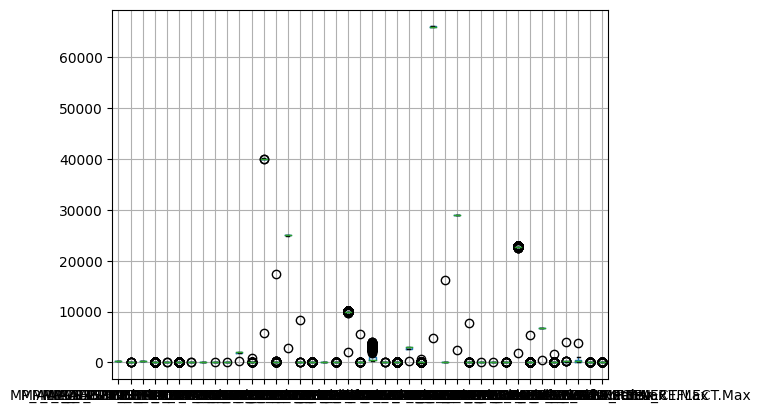

In [3]:
df_ts_x.boxplot()

In [4]:
df_ts_x.describe()

,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,MP_ALLSTEP.OUTER_TEMP.Stdev,MP_ALLSTEP.WALLHTR_TEMP1.Mean,MP_ALLSTEP.WALLHTR_TEMP1.Stdev,MP_STEP1_First10sec.PC_PRESSURE.Area,MP_STEP1_First10sec.PC_PRESSURE.Min,MP_STEP3.MATCHER_VDC.Mean,MP_STEP3.MATCHER_VDC.Stdev,...,MP_STEP4.PC_TV_ANGLE.Mean,MP_STEP4.PC_TV_ANGLE.Stdev,MP_STEP4.RFGEN_FORWARD.Mean,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,338.619298,0.558596,359.136533,0.410961,133.984847,0.099443,0.111339,0.006960,33.558794,0.246327,...,32.635077,0.063424,22771.347855,6.547262,6791.013254,3.270509,190.264663,372.362075,99.755280,99.731530
std,1.023400,0.084916,0.378497,0.130614,2.845739,0.170259,0.029934,0.004802,5.677653,0.448220,...,1.218116,0.253612,482.618105,118.120220,143.838657,34.665874,97.567237,263.582054,0.747327,0.830993
min,336.268400,0.312300,358.090000,0.000000,128.062400,0.000000,0.061600,0.000000,7.688500,0.000000,...,17.090600,0.024323,1779.389900,1.958600,376.560200,0.887400,46.389600,63.724600,96.660000,97.360000
25%,337.709150,0.496602,358.868025,0.371223,132.000000,0.000000,0.086788,0.003000,29.217775,0.000000,...,31.623325,0.051400,22724.007500,2.600474,6784.390000,1.988674,149.423200,149.423200,99.290000,99.370000
50%,338.862150,0.517136,359.180000,0.467400,134.000000,0.000000,0.104650,0.008000,34.000000,0.290803,...,32.669750,0.058800,22743.518200,2.780458,6787.955000,2.331300,193.617650,285.295728,99.690000,99.800000
75%,339.512900,0.625600,359.447150,0.496600,136.000000,0.160229,0.135925,0.010000,38.000000,0.458368,...,33.538450,0.064959,22764.392500,3.018418,6804.340000,2.681731,225.110350,538.482800,100.080000,100.090000
max,340.510000,1.340400,360.120000,0.684499,142.836300,0.626363,0.226000,0.017000,44.360000,17.751500,...,35.188400,11.390100,22974.690000,5282.524100,6806.280000,1552.042000,4000.000000,3872.795000,104.180000,108.550000


In [5]:
df_ts_x[df_ts_x['MP_STEP4.SIH4_FLOW.Stdev'] > 100]

,MP_ALLSTEP.INNER_TEMP.Mean,MP_ALLSTEP.INNER_TEMP.Stdev,MP_ALLSTEP.OUTER_TEMP.Mean,MP_ALLSTEP.OUTER_TEMP.Stdev,MP_ALLSTEP.WALLHTR_TEMP1.Mean,MP_ALLSTEP.WALLHTR_TEMP1.Stdev,MP_STEP1_First10sec.PC_PRESSURE.Area,MP_STEP1_First10sec.PC_PRESSURE.Min,MP_STEP3.MATCHER_VDC.Mean,MP_STEP3.MATCHER_VDC.Stdev,...,MP_STEP4.PC_TV_ANGLE.Mean,MP_STEP4.PC_TV_ANGLE.Stdev,MP_STEP4.RFGEN_FORWARD.Mean,MP_STEP4.RFGEN_FORWARD.Stdev,MP_STEP4.SIH4_FLOW.Mean,MP_STEP4.SIH4_FLOW.Stdev,MP_STEP4_No_Shift.RFGEN_REFLECT.Max,MP_STEP5_to_Last_PWR_Lift.RFGEN_REFLECT.Max,MP_STEP4.EI2.Max,MP_STEP4.EI3.Max
1417,339.7675,1.3404,359.6549,0.5816,133.7788,0.4151,0.1055,0.007,7.6885,17.7515,...,17.0906,11.3901,1779.3899,5282.5241,376.5602,1552.042,4000.0,3872.795,101.41,100.52


In [6]:
df_ts_x.drop(index=1417, inplace=True)

## PCA

In [7]:
cov_df = np.corrcoef(df_tr_x)
cov_df

array([[1.        , 0.99997114, 0.99997529, ..., 0.99999766, 0.99996146,
        0.9999924 ],
       [0.99997114, 1.        , 0.99995674, ..., 0.99995894, 0.99995238,
        0.99997101],
       [0.99997529, 0.99995674, 1.        , ..., 0.99997871, 0.99999082,
        0.9999915 ],
       ...,
       [0.99999766, 0.99995894, 0.99997871, ..., 1.        , 0.99996542,
        0.9999929 ],
       [0.99996146, 0.99995238, 0.99999082, ..., 0.99996542, 1.        ,
        0.99998795],
       [0.9999924 , 0.99997101, 0.9999915 , ..., 0.9999929 , 0.99998795,
        1.        ]])

img = plt.matshow(cov_df, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(tqdm(cov_df.shape[0])):
    for y in range(cov_df.shape[1]):
        plt.text(x, y, "%0.2f" % cov_df[x,y], size=30, color='black', ha="center", va="center")
        
plt.show()

In [8]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [9]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(df_tr_x)

In [10]:
pca = convers_pca(no_of_components=3)
pca.fit(transformed)

In [11]:
x_std = pca.transform(transformed)

plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1])

In [12]:
sns.set_style('whitegrid')

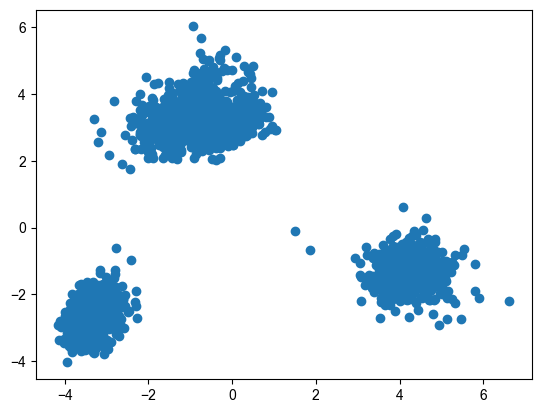

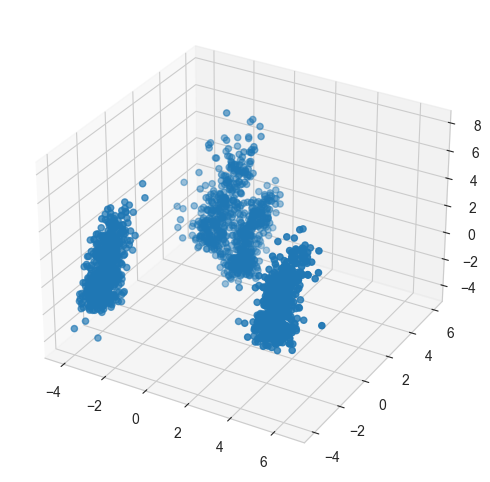

In [13]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_std[:, 0], x_std[:, 1], x_std[:, 2])
plt.show()

In [14]:
std = StandardScaler()
transformed_2 = StandardScaler().fit_transform(df_ts_x)

pca_2 = convers_pca(no_of_components=3)
pca_2.fit(transformed_2)

x_std_2 = pca_2.transform(transformed_2)

plt.figure()
plt.scatter(x_std_2[:, 0], x_std_2[:, 1])

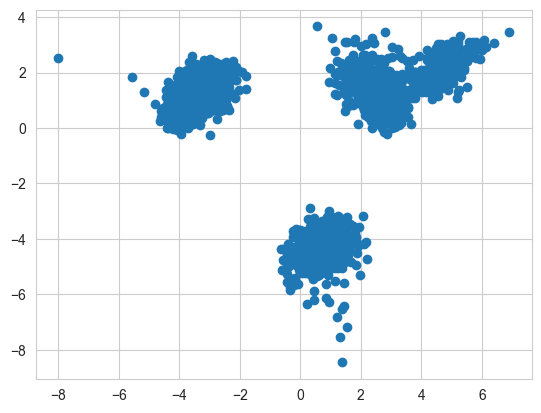

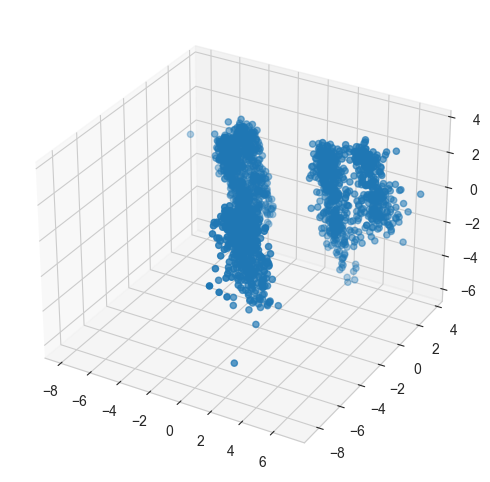

In [15]:
fig = plt.figure(figsize=(9, 6))
ax_2 = fig.add_subplot(111, projection='3d')
ax_2.scatter(x_std_2[:, 0], x_std_2[:, 1], x_std_2[:, 2])
plt.show()

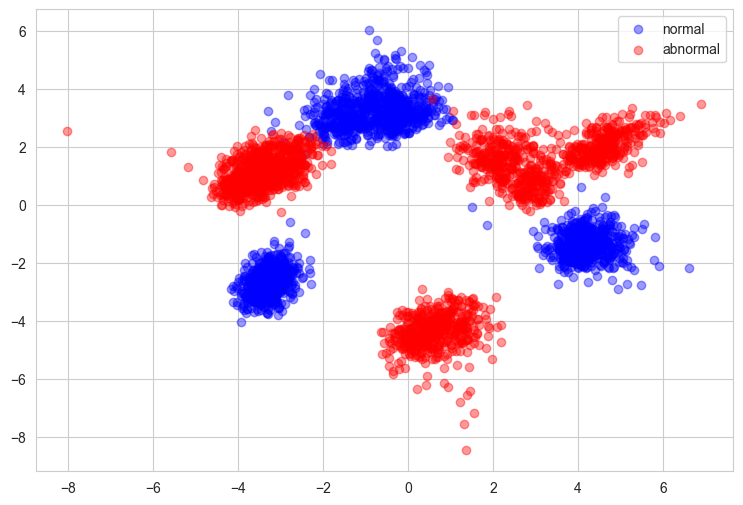

In [16]:
fig = plt.figure(figsize=(9, 6))
plt.scatter(x_std[:, 0], x_std[:, 1], color = 'b', alpha = 0.4, label = 'normal')
plt.scatter(x_std_2[:, 0], x_std_2[:, 1],  color = 'r', alpha = 0.4, label = 'abnormal')
plt.legend()
plt.show()

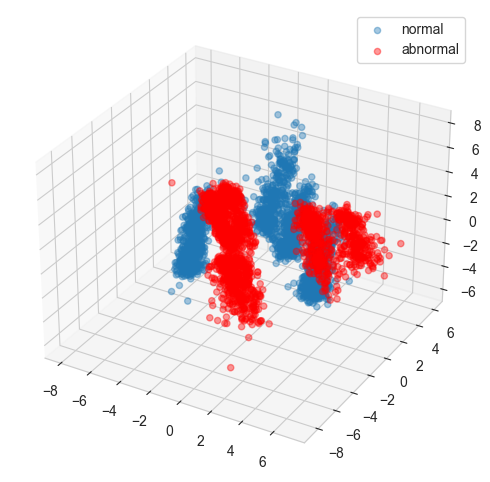

In [17]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_std[:, 0], x_std[:, 1], x_std[:, 2], label = 'normal', alpha= 0.4)
ax.scatter(x_std_2[:, 0], x_std_2[:, 1], x_std_2[:, 2], label = 'abnormal', alpha= 0.4, color = 'r')
plt.legend()
plt.show()